# XOR 練習
http://speech.ee.ntu.edu.tw/~tlkagk/courses/MLDS_2015_2/Lecture/Theano%20DNN.pdf#page=32

In [48]:
%pylab inline
import theano
import theano.tensor as T
import itertools as it

Populating the interactive namespace from numpy and matplotlib


In [49]:
def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

In [50]:
# x1, x2    
x = T.vector()

In [51]:
# init weights
w1 = theano.shared(floatX(np.random.randn(2)))
b1 = theano.shared(floatX(np.random.randn(1)))
w2 = theano.shared(floatX(np.random.randn(2)))
b2 = theano.shared(floatX(np.random.randn(1)))
w = theano.shared(floatX(np.random.randn(2)))
b = theano.shared(floatX(np.random.randn(1)))

In [52]:
# hidden layer
z1 = T.dot(w1, x) + b1
a1 = 1 / (1 + T.exp(-1 * z1))
z2 = T.dot(w2, x) + b2
a2 = 1 / (1 + T.exp(-1 * z2))

In [53]:
# output layer
z = T.dot(w, [a1, a2]) + b
y = 1 / (1 + T.exp(-1 * z))

In [54]:
# cost (cross entropy)
y_hat = T.scalar()
cost = - (y_hat * T.log(y) + (1 - y_hat) * T.log(1 - y)).sum()

In [55]:
# grad
def gd(params, grads, lr):
    updates = []
    for p, g in it.izip(params, grads):      
        updates.append([p, p - lr*g])
    return updates
    
dw, db, dw1, db1, dw2, db2 = T.grad(cost, [w, b, w1, b1, w2, b2])

In [56]:
train = theano.function(inputs=[x, y_hat],
                        outputs=[y, cost, w, b, w1, b1, w2, b2],
                        updates=gd([w, b, w1, b1, w2, b2], [dw, db, dw1, db1, dw2, db2], 0.01))

In [57]:
for i in range(100000):
    y1, c1, _w, _b, _w1, _b1, _w2, _b2 = train([0, 0], 0)
    y2, c2, _w, _b, _w1, _b1, _w2, _b2 = train([0, 1], 1)
    y3, c3, _w, _b, _w1, _b1, _w2, _b2 = train([1, 0], 1)
    y4, c4, _w, _b, _w1, _b1, _w2, _b2 = train([1, 1], 0)

In [58]:
print 'cost=%f' % (c1+c2+c3+c4)
print y1,y2,y3,y4

cost=0.010359
[ 0.00219914] [ 0.99767688] [ 0.99767438] [ 0.00349725]


# <span style='color:red'>hidden layer像是做了feature transform</span>
http://speech.ee.ntu.edu.tw/~tlkagk/courses/MLDS_2015_2/Lecture/DNN%20(v4).pdf#page=23

XOR
- 0 0 | 0
- 0 1 | 1
- 1 0 | 1
- 1 1 | 0

a1 = 隱藏層第一個神經元
a2 = 隱藏層第二個神經元

a1_00 = 輸入[0 0]結果

[ 0.95600492] [ 0.01579165] [ 0.01596399] [  1.19787033e-05]
[ 0.99986757] [ 0.95017689] [ 0.95026927] [ 0.04604287]


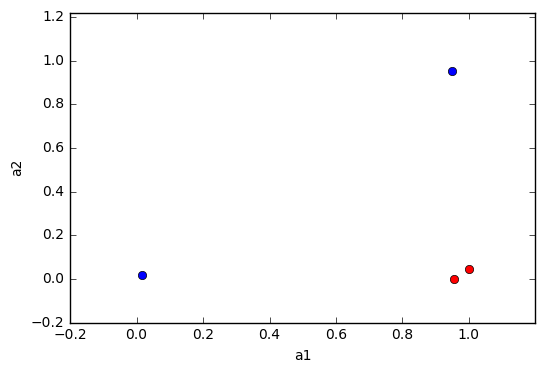

In [59]:
a1_00 =  1 / (1 + np.exp(-1 * (np.dot(_w1, [0,0]) + _b1)))
a1_01 =  1 / (1 + np.exp(-1 * (np.dot(_w1, [0,1]) + _b1)))
a1_10 =  1 / (1 + np.exp(-1 * (np.dot(_w1, [1,0]) + _b1)))
a1_11 =  1 / (1 + np.exp(-1 * (np.dot(_w1, [1,1]) + _b1)))
print a1_00, a1_01, a1_10, a1_11

a2_00 =  1 / (1 + np.exp(-1 * (np.dot(_w2, [0,0]) + _b2)))
a2_01 =  1 / (1 + np.exp(-1 * (np.dot(_w2, [0,1]) + _b2)))
a2_10 =  1 / (1 + np.exp(-1 * (np.dot(_w2, [1,0]) + _b2)))
a2_11 =  1 / (1 + np.exp(-1 * (np.dot(_w2, [1,1]) + _b2)))
print a2_00, a2_01, a2_10, a2_11

plt.plot([a1_00, a2_00], [a1_11, a2_11], 'ro', [a1_01, a2_01], [a1_10, a2_10], 'bo')
plt.xlabel('a1')
plt.ylabel('a2')
plt.axis([-0.2, 1.2, -0.2, 1.22])
plt.show()

# 上面的圖有兩種

![alt tag](https://github.com/JiaMauJian/gradient-descent/blob/master/nb_img/xor.png?raw=true)
* a_00 : 0 0 | 0
* a_01 : 0 0 | 1
* a_10 : 0 0 | 1
* a_11 : 0 0 | 0

In [60]:
a_00 = np.array([float(a1_00), float(a2_00)])
a = 1 / ( 1 + np.exp( -1 * (np.dot(_w, a_00) + _b) ) )
print 'a_00=%f' % (a)

a_01 = np.array([float(a1_01), float(a2_01)])
a = 1 / ( 1 + np.exp( -1 * (np.dot(_w, a_01) + _b) ) )
print 'a_01=%f' % (a)

a_10 = np.array([float(a1_10), float(a2_10)])
a = 1 / ( 1 + np.exp( -1 * (np.dot(_w, a_10) + _b) ) )
print 'a_10=%f' % (a)

a_11 = np.array([float(a1_11), float(a2_11)])
a = 1 / ( 1 + np.exp( -1 * (np.dot(_w, a_11) + _b) ) )
print 'a_11=%f' % (a)

a_00=0.002199
a_01=0.997677
a_10=0.997675
a_11=0.003497
